# Import packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Import dataset

In [22]:
from CPR import analysis

inputs = analysis.get_dataset()

# make dataset smaller for analysis
inputs = inputs.sample(500)
inputs.head()

,byear,sex,ret_age,education,init_wage,pension,bal_rrsp,bal_tfsa,bal_other_reg,bal_unreg,cont_rate_rrsp,cont_rate_tfsa,cont_rate_other_reg,cont_rate_unreg,withdrawal_rrsp,withdrawal_tfsa,withdrawal_other_reg,withdrawal_unreg,replacement_rate_db,rate_employee_db,income_previous_db,init_dc,rate_employee_dc,rate_employer_dc,s_byear,s_sex,s_ret_age,s_education,s_init_wage,s_pension,s_bal_rrsp,s_bal_tfsa,s_bal_other_reg,s_bal_unreg,s_cont_rate_rrsp,s_cont_rate_tfsa,s_cont_rate_other_reg,s_cont_rate_unreg,s_withdrawal_rrsp,s_withdrawal_tfsa,s_withdrawal_other_reg,s_withdrawal_unreg,s_replacement_rate_db,s_rate_employee_db,s_income_previous_db,s_init_dc,s_rate_employee_dc,s_rate_employer_dc,weight,couple,prov,first_residence,second_residence,price_first_residence,price_second_residence,business,price_business,mix_bonds,mix_bills,mix_equity,fee,fee_equity,credit_card,personal_loan,student_loan,car_loan,credit_line,first_mortgage,second_mortgage,other_debt,credit_card_payment,personal_loan_payment,student_loan_payment,car_loan_payment,credit_line_payment,first_mortgage_payment,second_mortgage_payment,other_debt_payment,claim_age_cpp,s_claim_age_cpp,cap_gains_unreg,s_cap_gains_unreg,realized_losses_unreg,s_realized_losses_unreg,init_room_rrsp,init_room_tfsa,s_init_room_rrsp,s_init_room_tfsa
405,1966.0,male,55.0,high school,45000.0,NaN,115000.000000,10000.0,NaN,NaN,0.023077,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.70,0.09,NaN,NaN,NaN,NaN,1988.0,female,55.0,university,60000.0,NaN,250000.000000,20000.00000,40000.000000,NaN,0.031250,0.000000,0.0,NaN,0.0,0.0,0.0,NaN,0.5,0.05,NaN,NaN,NaN,NaN,1,True,qc,380000.0,NaN,380000.0,NaN,NaN,NaN,0.377622,0.055944,0.566434,0.014720,0.008497,NaN,NaN,NaN,NaN,NaN,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1250.0,NaN,NaN,60.0,65.0,0,0.0,0,0.0,0,0,0.0,0.0
1190,1981.0,male,60.0,university,75000.0,NaN,4405.797101,15000.0,10555.555556,NaN,0.000000,0.0,0.011111,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978.0,female,67.0,post-secondary,51000.0,NaN,23333.333333,15000.00000,NaN,110000.0,0.045714,0.069444,NaN,0.096154,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,True,qc,1.0,NaN,1.0,NaN,0.0,0.0,0.000000,1.000000,0.000000,0.010000,0.000000,NaN,NaN,NaN,8000.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,350.0,NaN,1.0,NaN,NaN,60.0,65.0,0,0.0,0,0.0,0,0,0.0,0.0
1132,1961.0,female,68.0,less than high school,85000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983.0,male,55.0,high school,100000.0,NaN,6666.666667,NaN,NaN,200.0,0.000000,NaN,NaN,0.060000,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,True,on,450000.0,NaN,450000.0,NaN,NaN,NaN,0.133333,0.000000,0.866667,0.011000,0.009000,NaN,NaN,NaN,NaN,NaN,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,700.0,NaN,NaN,65.0,60.0,0,0.0,0,0.0,0,0,0.0,0.0
731,1964.0,male,58.0,university,35000.0,NaN,NaN,NaN,NaN,565000.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.45,0.09,NaN,75000.0,0.04,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,on,350000.0,NaN,350000.0,NaN,NaN,NaN,0.037500,0.906250,0.056250,0.002656,0.000844,25000.0,NaN,NaN,NaN,NaN,185000.0,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,1100.0,NaN,NaN,61.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN
1754,1955.0,female,68.0,university,70000.0,NaN,NaN,NaN,12000.000000,15000.0,NaN,NaN,0.000000,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,1968.0,male,58.0,post-secondary,36038.0,6000.0,40000.000000,89560.97561,207640.449438,60000.0,0.026562,0.022358,0.0,0.283019,0.0,0.0,0.0,0.0,0.7,0.05,5000.0,NaN,NaN,NaN,1,True,on,NaN,NaN,NaN,NaN,0.0,0.0,0.978261,0.021739,0.000000,0.019783,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,70.0,0,0.0,0,0.0,0,0,0.0,0.0


# Run model
Deterministic model and stochastic model with 25 simulations

In [3]:
from CPR import main

res_deter = main.run_simulations(inputs, 1, non_stochastic=True)
res_deter.summarize()


total time: 12.199623107910156

Deterministic Model

Extra parameters:
multiprocessing: True


In [43]:
res_stoch = main.run_simulations(inputs, 50, non_stochastic=False)
res_stoch.summarize()


total time: 335.35187005996704

Stochastic Model, 50 simulations

Extra parameters:
multiprocessing: True


# Analyse results

## See output

In [38]:
res_deter.output.head()

,hh_index,sim,wage_bef,pension_bef,s_wage_bef,s_pension_bef,cons_bef,unreg_balance_bef,rrsp_balance_bef,tfsa_balance_bef,s_unreg_balance_bef,s_tfsa_balance_bef,wage_part,pension_part,s_wage_part,s_pension_part,unreg_balance_part,rrsp_balance_part,tfsa_balance_part,s_unreg_balance_part,s_tfsa_balance_part,annuity_rrsp_part,annuity_rpp_dc_part,annuity_non_rrsp_part,s_annuity_rrsp_part,s_annuity_rpp_dc_part,s_annuity_non_rrsp_part,wage_after,pension_after,s_wage_after,s_pension_after,annuity_rrsp_after,annuity_rpp_dc_after,annuity_non_rrsp_after,s_annuity_rrsp_after,s_annuity_rpp_dc_after,s_annuity_non_rrsp_after,cons_after,cpp_after,gis_after,oas_after,s_cpp_after,s_gis_after,s_oas_after,first_residence_bef,first_mortgage_balance_bef,rpp_dc_bef,first_residence_after,first_mortgage_balance_after,business_bef,business_after,second_residence_bef,first_residence_part,second_residence_part,first_mortgage_balance_part,second_residence_after,rpp_db_benefits_after,s_rpp_dc_bef,s_rpp_dc_part,rpp_dc_part,s_rrsp_balance_bef,s_rrsp_balance_part,s_rpp_db_benefits_after,s_other_reg_balance_bef,s_other_reg_balance_part,other_reg_balance_bef,other_reg_balance_part,business_part
0,178,0,86199.055629,NaN,42005.057110,NaN,94299.441992,24186.851211,82968.011481,0.000000,0.0,1180.407920,0.0,NaN,40336.163186,NaN,0.0,0.0,0.0,0.0,0.000000,6064.960184,0.0,1424.353088,0.0,0.0,0.0,0.0,NaN,0.0,NaN,6064.960184,0.000000,1424.353088,0.0,0.0,0.000000,38798.144432,9305.164523,397.326072,7121.31,6875.566824,397.326072,7121.310000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,188,0,41000.000000,NaN,NaN,NaN,28324.587620,0.000000,142351.565060,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,11357.047132,3509.207269,0.000000,NaN,NaN,NaN,31740.290371,11505.163948,0.000000,7121.31,NaN,NaN,NaN,408163.200000,11408.435839,42471.918,456288.718732,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1449,0,50992.752591,NaN,NaN,NaN,87547.568118,43955.709197,337460.848703,111.673222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,20433.253824,0.000000,2266.225533,NaN,NaN,NaN,98625.521136,18333.743633,0.000000,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.735934e+06,2.180510e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1871,0,55683.102908,NaN,29246.257377,NaN,62499.728020,258806.855414,66772.116038,0.000000,0.0,11986.886731,0.0,NaN,25000.224203,NaN,0.0,0.0,0.0,0.0,13172.845847,3234.403984,0.0,13722.277190,0.0,0.0,0.0,0.0,NaN,0.0,NaN,3234.403984,0.000000,13722.277190,0.0,0.0,920.942914,138975.870948,12592.556791,0.000000,0.00,19459.417854,0.000000,5821.235889,326665.946832,0.000000,NaN,366793.201705,0.000000,NaN,NaN,816664.86708,355571.836544,888929.59136,0.0,916983.004263,118499.084023,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1947,0,80000.000000,NaN,NaN,NaN,57598.462739,0.000000,20140.840000,1966.899000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1138.342797,0.000000,0.000000,NaN,NaN,NaN,13950.102116,14822.366144,1076.235530,7121.31,NaN,NaN,NaN,255102.000000,155001.749707,NaN,280385.194777,100175.852553,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Merge with input and check preparedness

In [39]:
res_deter.merge()
res_deter.check_preparedness()
df = res_deter.df_merged

print(f'percentage people prepared in sample: {df.prepared.mean() * 100}%')

percentage people prepared in sample: 75.2%


## RRI distribution

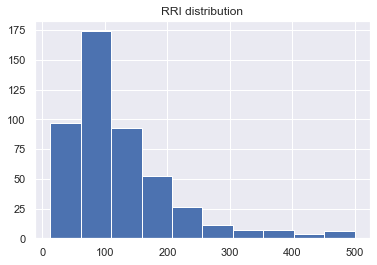

In [26]:
sns.set()
ax = df.rri[df.rri < 500].hist()
ax.set_title('RRI distribution')
plt.show()

## Risk
### Preparation rate at aggregate level

In [44]:
res_stoch.merge()
res_stoch.check_preparedness()
df = res_stoch.df_merged

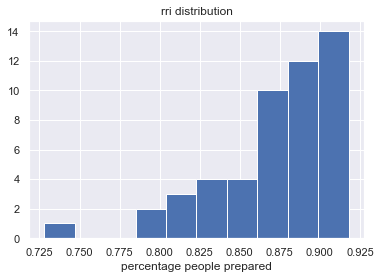

In [45]:
ax = df.groupby('sim')['prepared'].mean().hist()
ax.grid()
ax.set_title('rri distribution')
ax.set_xlabel('percentage people prepared')
ax.grid()
plt.show()

## Experiments
### Changes in returns

In [29]:
vars(res_deter.prices)

{'seed': 0,
 'inflation_rate': 0.02,
 'ret_equity_2018': -0.1041,
 'mu_equity': 0.0688,
 'rho_equity': 0.0,
 'sig_equity': 0.2179,
 'ret_dividends': 0.0417,
 'ret_bills_2018': -0.0029,
 'mu_bills': 0.0103,
 'rho_bills': 0.5756,
 'sig_bills': 0.06,
 'ret_bonds_2018': 0.0062,
 'mu_bonds': 0.0253,
 'rho_bonds': 0.3219,
 'sig_bonds': 0.1069,
 'ret_housing_2018': 0.0004,
 'mu_housing': 0.0161,
 'rho_housing': 0.21,
 'sig_housing': 0.0987,
 'price_rent_2018': 20.0,
 'mu_price_rent': 15.0,
 'rho_price_rent': 0.95,
 'sig_price_rent': 4.0,
 'corr_housing_price_rent': 0.6,
 'ret_business_2018': -0.1041,
 'mu_business': 0.0688,
 'rho_business': 0.0,
 'sig_business': 0.2179,
 'gr_rate_wage': 0.01,
 'rho_wage': 0.96235919,
 'sig_pers_wage': 0.050739054,
 'sig_trans_wage': 0.018554826,
 'adj_fact_annuities': 0.9,
 'ret_dividends_tsx': 0.028,
 'ret_bills': array([[0.017042  ],
        [0.02317441],
        [0.02672097],
        [0.02876795],
        [0.02994804],
        [0.03062791],
        [0.0310

In [30]:
factors

array([0.        , 0.22222222, 0.44444444, 0.66666667, 0.88888889,
       1.11111111, 1.33333333, 1.55555556, 1.77777778, 2.        ])

In [11]:
factors = np.linspace(0, 2, 10)

l_prepared = []
for factor in factors:
    res = main.run_simulations(inputs, 1, non_stochastic=True,
                                     multiprocessing=True,
                                     mu_equity=factor * 0.0688,
                                     mu_bills=factor * 0.0103,
                                     mu_bonds=factor * 0.0253)
    res.check_preparedness(factor_couple=np.sqrt(2), cons_floor=5000)
    l_prepared.append(res.df_merged.prepared.mean())    


total time: 12.164762496948242

total time: 13.62061333656311

total time: 13.871211528778076

total time: 13.258825778961182

total time: 13.607132196426392

total time: 13.159221172332764

total time: 13.406118154525757

total time: 13.598324537277222

total time: 14.096171140670776

total time: 13.813239336013794


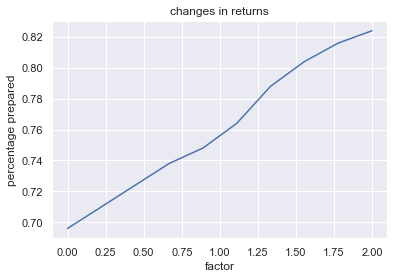

In [31]:
plt.plot(factors, l_prepared)
plt.title('changes in returns')
plt.xlabel('factor')
plt.ylabel('percentage prepared')
plt.show()

### Selling first residence

In [32]:
vars(res_deter.common)

{'nsim': 1,
 'non_stochastic': True,
 'base_year': 2018,
 'db_penalty_early_ret': 0.05,
 'rrsp_limit_2018': 26230.0,
 'rrsp_limit_2019': 26500.0,
 'rrsp_limit_2020': 27230.0,
 'rrsp_limit_2021': 27830.0,
 'gr_rrsp_limit': 0.03,
 'tfsa_limit_2018': 5500.0,
 'tfsa_limit_2019': 6000.0,
 'tfsa_limit_2020': 6000.0,
 'gr_tfsa_limit': 0.02,
 'gr_ympe': 0.03,
 'perc_cpp_2018': 0.25,
 'perc_cpp_2019': 0.262,
 'perc_cpp_2020': 0.274,
 'perc_cpp_2021': 0.29,
 'perc_cpp_2022': 0.31,
 'perc_cpp_2023': 0.33,
 'future_years': 110,
 'official_ret_age': 65,
 'min_age_cpp': 18,
 'max_ret_age': 75,
 'min_claim_age_cpp': 60,
 'max_claim_age_cpp': 70,
 'max_term_debts': 30,
 'age_cons_bef_ret': 55,
 'past_years': 50,
 'max_years_db': 35,
 'fee_rpp': 0.015,
 'max_age_no_rrif': 71,
 'frac_cap_gains': 0.5,
 'mix_bills_rpp': 0.0,
 'mix_bonds_rpp': 0.4,
 'mix_equity_rpp': 0.6,
 'perc_year_db': 0.02,
 'n_best_wages_db': 5,
 'db_offset': 600.0,
 'db_benefit_multiplier': 9.0,
 'db_minimum_age': 55,
 'db_ret_age_no

In [14]:
res_not_selling = main.run_simulations(inputs, 1, non_stochastic=True,
                                       multiprocessing=True,
                                       sell_first_resid=False)
res_not_selling.check_preparedness(factor_couple=np.sqrt(2), cons_floor=5000)
df = res_not_selling.df_merged

print(f'percentage people prepared without selling house: {df.prepared.mean() * 100}%')

res_selling = main.run_simulations(inputs, 1, non_stochastic=True,
                                   multiprocessing=True,
                                   sell_first_resid=True)
res_selling.check_preparedness(factor_couple=np.sqrt(2), cons_floor=5000)
df = res_selling.df_merged

print(f'percentage people prepared when selling house: {df.prepared.mean() * 100}%')


total time: 12.898482084274292
percentage people prepared without selling house: 75.6%

total time: 13.140774250030518
percentage people prepared when selling house: 76.6%


# Using CPR with other inputs

More info on the variables here: http://ire.hec.ca/en/wp-content/uploads/sites/3/2020/06/cpr-report-2020-final.pdf

In [33]:
inputs.head()

,byear,sex,ret_age,education,init_wage,pension,bal_rrsp,bal_tfsa,bal_other_reg,bal_unreg,cont_rate_rrsp,cont_rate_tfsa,cont_rate_other_reg,cont_rate_unreg,withdrawal_rrsp,withdrawal_tfsa,withdrawal_other_reg,withdrawal_unreg,replacement_rate_db,rate_employee_db,income_previous_db,init_dc,rate_employee_dc,rate_employer_dc,s_byear,s_sex,s_ret_age,s_education,s_init_wage,s_pension,s_bal_rrsp,s_bal_tfsa,s_bal_other_reg,s_bal_unreg,s_cont_rate_rrsp,s_cont_rate_tfsa,s_cont_rate_other_reg,s_cont_rate_unreg,s_withdrawal_rrsp,s_withdrawal_tfsa,s_withdrawal_other_reg,s_withdrawal_unreg,s_replacement_rate_db,s_rate_employee_db,s_income_previous_db,s_init_dc,s_rate_employee_dc,s_rate_employer_dc,weight,couple,prov,first_residence,second_residence,price_first_residence,price_second_residence,business,price_business,mix_bonds,mix_bills,mix_equity,fee,fee_equity,credit_card,personal_loan,student_loan,car_loan,credit_line,first_mortgage,second_mortgage,other_debt,credit_card_payment,personal_loan_payment,student_loan_payment,car_loan_payment,credit_line_payment,first_mortgage_payment,second_mortgage_payment,other_debt_payment,claim_age_cpp,s_claim_age_cpp,cap_gains_unreg,s_cap_gains_unreg,realized_losses_unreg,s_realized_losses_unreg,init_room_rrsp,init_room_tfsa,s_init_room_rrsp,s_init_room_tfsa
405,1966.0,male,55.0,high school,45000.0,NaN,115000.000000,10000.0,NaN,NaN,0.023077,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.70,0.09,NaN,NaN,NaN,NaN,1988.0,female,55.0,university,60000.0,NaN,250000.000000,20000.00000,40000.000000,NaN,0.031250,0.000000,0.0,NaN,0.0,0.0,0.0,NaN,0.5,0.05,NaN,NaN,NaN,NaN,1,True,qc,380000.0,NaN,380000.0,NaN,NaN,NaN,0.377622,0.055944,0.566434,0.014720,0.008497,NaN,NaN,NaN,NaN,NaN,15000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1250.0,NaN,NaN,60.0,65.0,0,0.0,0,0.0,0,0,0.0,0.0
1190,1981.0,male,60.0,university,75000.0,NaN,4405.797101,15000.0,10555.555556,NaN,0.000000,0.0,0.011111,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1978.0,female,67.0,post-secondary,51000.0,NaN,23333.333333,15000.00000,NaN,110000.0,0.045714,0.069444,NaN,0.096154,0.0,0.0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,True,qc,1.0,NaN,1.0,NaN,0.0,0.0,0.000000,1.000000,0.000000,0.010000,0.000000,NaN,NaN,NaN,8000.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,350.0,NaN,1.0,NaN,NaN,60.0,65.0,0,0.0,0,0.0,0,0,0.0,0.0
1132,1961.0,female,68.0,less than high school,85000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1983.0,male,55.0,high school,100000.0,NaN,6666.666667,NaN,NaN,200.0,0.000000,NaN,NaN,0.060000,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1,True,on,450000.0,NaN,450000.0,NaN,NaN,NaN,0.133333,0.000000,0.866667,0.011000,0.009000,NaN,NaN,NaN,NaN,NaN,150000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,700.0,NaN,NaN,65.0,60.0,0,0.0,0,0.0,0,0,0.0,0.0
731,1964.0,male,58.0,university,35000.0,NaN,NaN,NaN,NaN,565000.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,0.45,0.09,NaN,75000.0,0.04,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,False,on,350000.0,NaN,350000.0,NaN,NaN,NaN,0.037500,0.906250,0.056250,0.002656,0.000844,25000.0,NaN,NaN,NaN,NaN,185000.0,NaN,NaN,1000.0,NaN,NaN,NaN,NaN,1100.0,NaN,NaN,61.0,NaN,0,NaN,0,NaN,0,0,NaN,NaN
1754,1955.0,female,68.0,university,70000.0,NaN,NaN,NaN,12000.000000,15000.0,NaN,NaN,0.000000,0.0,NaN,NaN,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,1968.0,male,58.0,post-secondary,36038.0,6000.0,40000.000000,89560.97561,207640.449438,60000.0,0.026562,0.022358,0.0,0.283019,0.0,0.0,0.0,0.0,0.7,0.05,5000.0,NaN,NaN,NaN,1,True,on,NaN,NaN,NaN,NaN,0.0,0.0,0.978261,0.021739,0.000000,0.019783,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,60.0,70.0,0,0.0,0,0.0,0,0,0.0,0.0


In [34]:
# saving copy of dataframe
inputs.iloc[0, :].to_frame().T.to_csv('my_inputs.csv', index=False)

In [35]:
my_inputs = pd.read_csv('my_inputs.csv')

In [36]:
my_res = main.run_simulations(my_inputs, 100, non_stochastic=False,
                              multiprocessing=True)
my_res.check_preparedness()
df = my_res.df_merged

df.prepared.value_counts(normalize=True)


total time: 7.379489183425903


True    1.0
Name: prepared, dtype: float64

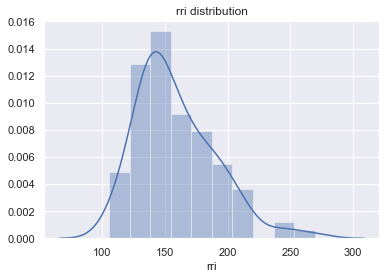

In [37]:
ax = sns.distplot(df.loc[df.rri<500, 'rri'])
ax.grid()
ax.set_title('rri distribution')
ax.grid()
plt.show()